Collatz binary notebook

In [5]:
"""
This notebook analyses collatz sequences from a binary perspective.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 600
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)
analysis_frame["bin_len"] = analysis_frame["bin_str"].apply(len)
analysis_frame["log2_xi"] = analysis_frame["collatz"].apply(log2)

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_growth"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

# Print data
print_frame = analysis_frame[[
    "v1", "collatz", "odd", "bin_len", "bin_str", "log2_xi", "bin_growth"]]

print_frame.columns = [
    "v1", "xi", "odd", "bin_len", "bin_str", "log2_xi", "bin_growth"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 101  K: 3 

  v1   xi  odd  bin_len    bin_str   log2_xi  bin_growth
 101  101    1        7    1100101  6.658211           0
 101  304    0        9  100110000  8.247928           2
 101  152    0        8   10011000  7.247928          -1
 101   76    0        7    1001100  6.247928          -1
 101   38    0        6     100110  5.247928          -1
 101   19    1        5      10011  4.247928          -1
 101   58    0        6     111010  5.857981           1
 101   29    1        5      11101  4.857981          -1
 101   88    0        7    1011000  6.459432           2
 101   44    0        6     101100  5.459432          -1
 101   22    0        5      10110  4.459432          -1
 101   11    1        4       1011  3.459432          -1
 101   34    0        6     100010  5.087463           2
 101   17    1        5      10001  4.087463          -1
 101   52    0        6     110100  5.700440           1
 101   26    0        5      11010  4.700440          -1
 101  

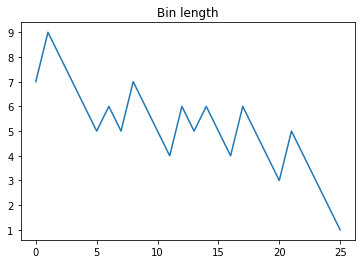

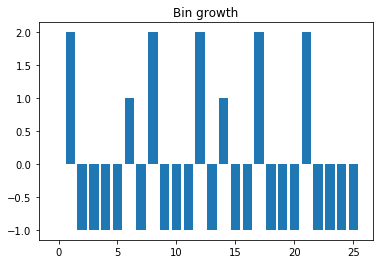

In [6]:
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Bin growth")
plt.bar(analysis_frame.index, analysis_frame["bin_growth"])

plt.show()